In [22]:
df = pd.read_excel("data/SKU/0043121-X_2.xlsx")
df = df[['Sku', 'Created', 'AdjustmentQty']]
df = df[['Sku', 'Created', 'AdjustmentQty']].rename(columns={'AdjustmentQty': 'Quantity'})
df.to_csv("data/SKU2/0043121-X_2.csv")
df

,Sku,Created,Quantity
0,0043121-X,10/16/2023 1:59:07 PM,24
1,0043121-X,10/18/2023 2:09:15 PM,12
2,0043121-X,10/19/2023 11:25:47 AM,12
3,0043121-X,10/19/2023 11:30:16 AM,12
4,0043121-X,10/19/2023 11:48:47 AM,24
...,...,...,...
8288,0043121-X,2/11/2025 7:34:58 PM,12
8289,0043121-X,2/11/2025 7:43:30 PM,12
8290,0043121-X,2/12/2025 3:57:20 PM,12
8291,0043121-X,2/12/2025 4:48:40 PM,12


/var/folders/bf/t7zr8nds6f727x199sygjpbh0000gn/T/ipykernel_32785/3803071085.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created'] = pd.to_datetime(df['Created'])


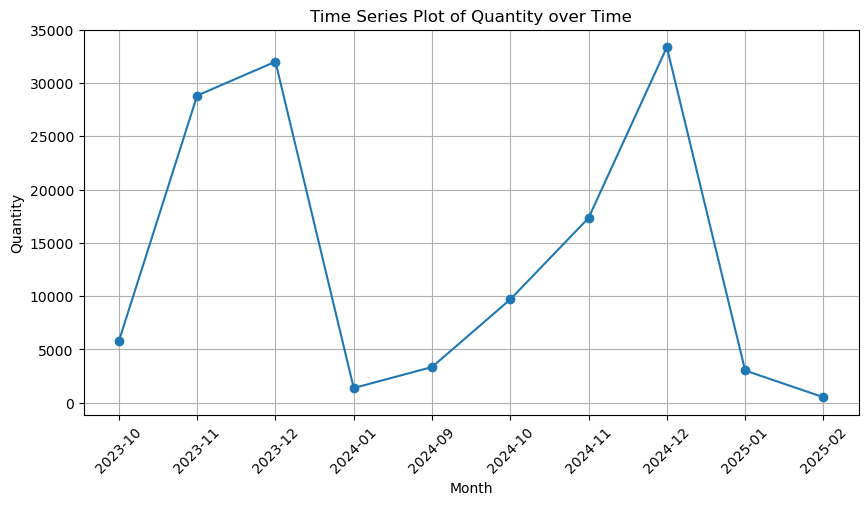

               Model           MSE          RMSE           MAE        R²
0  Linear Regression  7.415742e+07   8611.470230   8311.087087  0.554369
1              Ridge  7.261811e+07   8521.625873   8245.014194  0.563619
2              Lasso  7.413818e+07   8610.353090   8310.563167  0.554485
3        Elastic Net  7.063798e+07   8404.640560   8106.470706  0.575518
4                SVR  2.333879e+08  15277.036838  12899.999886 -0.402487
5      Decision Tree  6.729250e+07   8203.200351   6564.000000  0.595622
6      Random Forest  7.772327e+07   8816.080071   7007.820000  0.532941
7  Gradient Boosting  8.230092e+07   9071.985323   7507.259077  0.505433
8            XGBoost  6.908620e+07   8311.810871   6996.000977  0.584843
9           CatBoost  9.384822e+07   9687.529174   7149.442062  0.436042


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

# Function to load and prepare data
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df.drop(columns=['Sku'], inplace=True)  # Drop SKU column if not needed for prediction
    df['Created'] = pd.to_datetime(df['Created'])
    
    # Extract year and month from the 'Created' column for monthly aggregation
    df['YearMonth'] = df['Created'].dt.to_period('M')  # Create a period for year-month
    
    # Aggregate the quantity by Year-Month
    monthly_data = df.groupby('YearMonth')['Quantity'].sum().reset_index()  # Sum the quantities for each month
    
    # Feature Engineering for the aggregated data (you can also add more features if needed)
    monthly_data['Month'] = monthly_data['YearMonth'].dt.month  # Extract month from YearMonth for feature
    monthly_data['Year'] = monthly_data['YearMonth'].dt.year  # Extract year as a feature
    
    return monthly_data

# Function to plot the time series data
def plot_timeseries(data):
    plt.figure(figsize=(10, 5))
    plt.plot(data['YearMonth'].astype(str), data['Quantity'], marker='o', linestyle='-')
    plt.title('Time Series Plot of Quantity over Time')
    plt.xlabel('Month')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Function to build and evaluate models
def build_and_evaluate_models(data):
    X = data[['Month', 'Year']]  # Using 'Month' and 'Year' as features
    y = data['Quantity']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Models list without GridSearch for simplicity
    models = [
        ('Linear Regression', LinearRegression()),
        ('Ridge', Ridge()),
        ('Lasso', Lasso()),
        ('Elastic Net', ElasticNet()),
        ('SVR', SVR()),
        ('Decision Tree', DecisionTreeRegressor()),
        ('Random Forest', RandomForestRegressor()),
        ('Gradient Boosting', GradientBoostingRegressor()),
        ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror')),
        ('CatBoost', CatBoostRegressor(verbose=0))
    ]
    
    results = {}
    
    for name, model in models:
        try:
            # Fit the model
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            
            # Metrics calculation
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            
            results[name] = {
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'R²': r2
            }
        except Exception as e:
            print(f"Error training {name}: {e}")
    
    # Convert the results dictionary to a DataFrame
    results_df = pd.DataFrame(results).T
    results_df.index.name = 'Model'
    results_df.reset_index(inplace=True)
    
    return results_df

# Example usage
filepath = 'data/SKU2/0043121-X_2.csv'
data = load_and_prepare_data(filepath)
plot_timeseries(data)
results = build_and_evaluate_models(data)
print(results)

In [10]:
pd.read_csv("data/SKU/0043121-X_2.csv")

,Sku,Created,Quantity
0,0043121-X,1/4/2024 8:07:23 AM,12
1,0043121-X,1/4/2024 10:29:35 AM,12
2,0043121-X,1/4/2024 2:26:31 PM,24
3,0043121-X,1/4/2024 2:39:40 PM,12
4,0043121-X,1/4/2024 3:11:07 PM,12
...,...,...,...
4166,0043121-X,10/23/2023 1:10:57 PM,12
4167,0043121-X,10/23/2023 1:16:14 PM,12
4168,0043121-X,10/23/2023 1:43:45 PM,12
4169,0043121-X,10/23/2023 1:46:00 PM,12


/var/folders/bf/t7zr8nds6f727x199sygjpbh0000gn/T/ipykernel_32785/989221235.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created'] = pd.to_datetime(df['Created'])


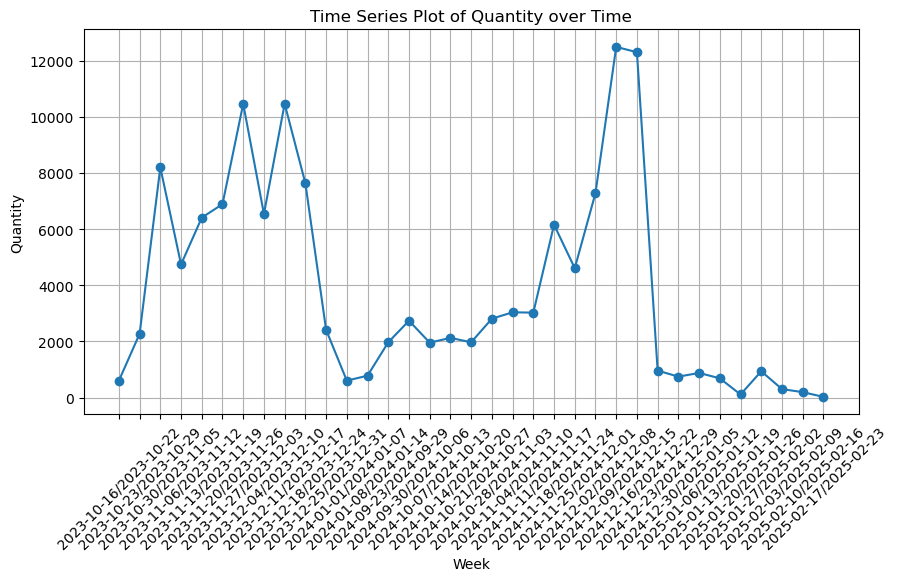

               Model           MSE         RMSE          MAE        R²
0  Linear Regression  1.283020e+07  3581.927414  2929.579983  0.153969
1              Ridge  1.286189e+07  3586.348104  2935.670416  0.151879
2              Lasso  1.283183e+07  3582.154533  2929.908222  0.153862
3        Elastic Net  1.302524e+07  3609.049493  2959.658593  0.141108
4                SVR  1.690529e+07  4111.604656  2669.996944 -0.114745
5      Decision Tree  8.326491e+05   912.496106   737.142857  0.945095
6      Random Forest  6.025220e+06  2454.632271  1681.868571  0.602694
7  Gradient Boosting  4.571113e+06  2138.016225  1403.002572  0.698578
8            XGBoost  1.576509e+06  1255.591014  1052.964942  0.896044
9           CatBoost  7.120524e+06  2668.431000  1781.635515  0.530469


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df.drop(columns=['Sku'], inplace=True)  # Drop SKU column if not needed for prediction
    df['Created'] = pd.to_datetime(df['Created'])
    
    # Extract week and year from the 'Created' column for weekly aggregation
    df['YearWeek'] = df['Created'].dt.to_period('W')  # Convert to a period with weekly frequency
    
    # Aggregate the quantity by Year-Week
    weekly_data = df.groupby('YearWeek')['Quantity'].sum().reset_index()  # Sum the quantities for each week
    
    # Feature Engineering for the aggregated data
    weekly_data['Week'] = weekly_data['YearWeek'].dt.week  # Extract week number from YearWeek
    weekly_data['Year'] = weekly_data['YearWeek'].dt.year  # Extract year as a feature
    
    return weekly_data

def plot_timeseries(data):
    plt.figure(figsize=(10, 5))
    plt.plot(data['YearWeek'].astype(str), data['Quantity'], marker='o', linestyle='-')
    plt.title('Time Series Plot of Quantity over Time')
    plt.xlabel('Week')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def build_and_evaluate_models(data):
    X = data[['Week', 'Year']]  # Using 'Week' and 'Year' as features for weekly data
    y = data['Quantity']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Models list without GridSearch for simplicity
    models = [
        ('Linear Regression', LinearRegression()),
        ('Ridge', Ridge()),
        ('Lasso', Lasso()),
        ('Elastic Net', ElasticNet()),
        ('SVR', SVR()),
        ('Decision Tree', DecisionTreeRegressor()),
        ('Random Forest', RandomForestRegressor()),
        ('Gradient Boosting', GradientBoostingRegressor()),
        ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror')),
        ('CatBoost', CatBoostRegressor(verbose=0))
    ]
    
    results = {}
    
    for name, model in models:
        try:
            # Fit the model
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            
            # Metrics calculation
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            
            results[name] = {
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'R²': r2
            }
        except Exception as e:
            print(f"Error training {name}: {e}")
    
    # Convert the results dictionary to a DataFrame
    results_df = pd.DataFrame(results).T
    results_df.index.name = 'Model'
    results_df.reset_index(inplace=True)
    
    return results_df

# Example usage
filepath = 'data/SKU2/0043121-X_2.csv'
data = load_and_prepare_data(filepath)
plot_timeseries(data)
results = build_and_evaluate_models(data)
print(results)